# 인공신경망, 비지도학습 中 군집화

- 간단한 인공신경망 모델 생성

In [125]:
install.packages('nnet')
library(nnet)

df = data.frame(
x2 = c(1:6),
x1 = c(6:1),
y = factor(c('no','no','no','yes','yes','yes')))

str(df)

Warning message:
"package 'nnet' is in use and will not be installed"


'data.frame':	6 obs. of  3 variables:
 $ x2: int  1 2 3 4 5 6
 $ x1: int  6 5 4 3 2 1
 $ y : Factor w/ 2 levels "no","yes": 1 1 1 2 2 2


In [126]:
df

x2,x1,y
<int>,<int>,<fct>
1,6,no
2,5,no
3,4,no
4,3,yes
5,2,yes
6,1,yes


In [2]:
# 인공신경망 모델 생성
model_net = nnet(y~., df, size = 1) 
# size = 은닉층 수

# weights:  5
initial  value 4.252524 
iter  10 value 0.067535
iter  20 value 0.010423
iter  30 value 0.000107
final  value 0.000074 
converged


- 5개의 가중치가 생성되고, 기계학습으로 오차가 점진적으로 줄어드는 결과를 볼 수 있다.

In [3]:
# 모델 결과 변수 보기 
model_net

a 2-1-1 network with 5 weights
inputs: x2 x1 
output(s): y 
options were - entropy fitting 

- 위위셀에서 5개의 가중치가 생성되었다고 했는데, 모델의 결과 변수를 통해서 5개 가중치의 신경망 구조를 확인할 수 있다. 
- 신경망(a 2 - 1 - 1)은 경계값 - 입력변수 - 은닉층 - 출력변수의 망 형태로서 5개의 가중치를 보여주고 있다.

In [4]:
# 가중치 보기
summary(model_net)

a 2-1-1 network with 5 weights
options were - entropy fitting 
 b->h1 i1->h1 i2->h1 
  0.53  -7.71   7.47 
  b->o  h1->o 
 10.93 -22.83 

In [5]:
# 분류모델의 적합값 보기
model_net$fitted.values

1,6.792868e-06
2,6.792868e-06
3,6.901320e-06
4,9.999820e-01
5,9.999821e-01
6,9.999821e-01


- 1\~3 번째 관측치는 0에 가까운 수, 4\~6 번째 관측치는 1에 가까운 수로 예측하고 있다. 

In [6]:
# 분류모델의 예측치 생성과 분류 정확도
p = predict(model_net, df, type =  'class') # 분류모델의 예측치 생성
table(p, df$y) # 혼합 매트릭스 생성

     
p     no yes
  no   3   0
  yes  0   3

---

- iris 데이터 셋을 이용한 인공신경망 모델 생성

In [8]:
data(iris)
idx = sample(1 : nrow(iris), 0.7*nrow(iris))
training = iris[idx,]
testing = iris[-idx,]

In [74]:
# 인공신경망 모델 (은닉층 1개와 은닉층 3개) 생성
model_net_iris1 = nnet(Species~., training, size = 1) # 은닉층 1개

# weights:  11
initial  value 127.543486 
iter  10 value 51.391267
iter  20 value 47.757595
iter  30 value 47.736376
iter  40 value 47.436325
iter  50 value 31.795231
iter  60 value 9.869401
iter  70 value 5.211545
iter  80 value 4.766145
iter  90 value 2.679624
iter 100 value 2.242315
final  value 2.242315 
stopped after 100 iterations


In [76]:
model_net_iris1
# 가중치 11개

a 4-1-3 network with 11 weights
inputs: Sepal.Length Sepal.Width Petal.Length Petal.Width 
output(s): Species 
options were - softmax modelling 

In [85]:
model_net_iris3 = nnet(Species~., training, size = 3) # 은닉층 3개

# weights:  27
initial  value 116.795681 
iter  10 value 57.411266
iter  20 value 38.085291
iter  30 value 10.521599
iter  40 value 2.865933
iter  50 value 1.763894
iter  60 value 1.115130
iter  70 value 0.028303
iter  80 value 0.003758
iter  90 value 0.003746
iter 100 value 0.001560
final  value 0.001560 
stopped after 100 iterations


In [86]:
model_net_iris3
# 27개의 가중치를 갖는다.

a 4-3-3 network with 27 weights
inputs: Sepal.Length Sepal.Width Petal.Length Petal.Width 
output(s): Species 
options were - softmax modelling 

- 두 모델 모두 출력값이 3개.
- 한편, 입력변수의 값들이 일정하지 않거나, 값이 큰 경우에는 신경망 모델이 정상적으로 만들어지지 않기 때문에, 입력 변수를 대상으로 정규화과정 필요.

In [87]:
# 가중치 네트워크보기 - 은닉층 1개 신경망 모델
summary(model_net_iris1)

a 4-1-3 network with 11 weights
options were - softmax modelling 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1 
  -3.50   -0.14   -0.54    0.63    1.76 
  b->o1  h1->o1 
  34.94 -104.75 
  b->o2  h1->o2 
  27.56  -29.16 
  b->o3  h1->o3 
 -62.20  135.59 

- 은닉층의 노드가 1개, 11개의 가중치

In [88]:
# 가중치 네트워크보기 - 은닉층 3개 신경망 모델
summary(model_net_iris3)

a 4-3-3 network with 27 weights
options were - softmax modelling 
   b->h1   i1->h1   i2->h1   i3->h1   i4->h1 
   -0.34    -1.93    -1.56    -0.94     0.09 
   b->h2   i1->h2   i2->h2   i3->h2   i4->h2 
    6.28     0.22     0.94    -1.21    -3.30 
   b->h3   i1->h3   i2->h3   i3->h3   i4->h3 
   11.74    51.12    41.70     2.85    -2.75 
   b->o1   h1->o1   h2->o1   h3->o1 
-2476.29     0.39  4029.10   -50.20 
   b->o2   h1->o2   h2->o2   h3->o2 
  640.68     0.29   810.07    30.04 
   b->o3   h1->o3   h2->o3   h3->o3 
 1835.62     0.36 -4838.74    20.30 

- 은닉층의 노드가 3개, 27개의 가중치
- 은닉층의 노드 수가 1개씩 중가할 때마다 일정한 수만큼 가중치가 증가하기 때문에 컴퓨터는 더 많은 연산을 수행하게 된다. 

In [91]:
table(predict(model_net_iris1, testing, type = 'class'), testing$Species)

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         16         1
  virginica       0          0        13

In [92]:
table(predict(model_net_iris3, testing, type = 'class'), testing$Species)

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         16         1
  virginica       0          0        13

In [89]:
# 분류모델 평가
table(predict(model_net_iris1, testing, type = 'class'), testing$Species)
# 분류모델 평가
table(predict(model_net_iris3, testing, type = 'class'), testing$Species)

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         16         1
  virginica       0          0        13

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         16         1
  virginica       0          0        13

- nnet 패키지에서 제공되는 인공신경망 모델은 1개의 은닉층으로 최적화되어 있기 때문에, 은닉층 노드의 수를 3개로 늘려서 연산을 늘려도 분류정확도는 크게 달라지지 않는다. 

---

- 역전파 알고리즘을 적용할 수 있는 모델에 대해 알아보자
- 출력변수는 1과 0의 수치형이어야 한다. 

In [97]:
library(neuralnet)

data('iris')
idx = sample(1:nrow(iris), 0.7 * nrow(iris))
training_iris = iris[idx, ]
testing_iris = iris[-idx, ]

# 수치형으로 칼럼 생성
training_iris$Species2[training_iris$Species == 'setosa'] = 1
training_iris$Species2[training_iris$Species == 'versicolor'] = 2
training_iris$Species2[training_iris$Species == 'virginica'] = 3
training_iris$Species = NULL # 기존 칼럼 제거
head(training_iris,3)

testing_iris$Species2[testing_iris$Species == 'setosa'] = 1
testing_iris$Species2[testing_iris$Species == 'versicolor'] = 2
testing_iris$Species2[testing_iris$Species == 'virginica'] = 3
testing_iris$Species = NULL # 기존 칼럼 제거
head(testing_iris,3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57,6.3,3.3,4.7,1.6,2
110,7.2,3.6,6.1,2.5,3
70,5.6,2.5,3.9,1.1,2


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,4.7,3.2,1.3,0.2,1
7,4.6,3.4,1.4,0.3,1
9,4.4,2.9,1.4,0.2,1


In [99]:
# 데이터 정규화
# 정규화 함수 정의
normal = function(x){
    return((x - min(x)) / (max(x) - min(x)))}

In [100]:
# 정규화 함수 이용하여 데이터 정규화 진행
training_nor = as.data.frame(lapply(training_iris, normal))
summary(training_nor)
testing_nor = as.data.frame(lapply(testing_iris, normal))
summary(testing_nor)

  Sepal.Length     Sepal.Width      Petal.Length      Petal.Width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.2121   1st Qu.:0.3636   1st Qu.:0.08475   1st Qu.:0.08333  
 Median :0.4242   Median :0.4545   Median :0.57627   Median :0.54167  
 Mean   :0.4378   Mean   :0.4844   Mean   :0.46877   Mean   :0.46548  
 3rd Qu.:0.6061   3rd Qu.:0.6364   3rd Qu.:0.69492   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.00000  
    Species2     
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.5000  
 Mean   :0.5143  
 3rd Qu.:1.0000  
 Max.   :1.0000  

  Sepal.Length     Sepal.Width      Petal.Length      Petal.Width    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.2222   1st Qu.:0.2381   1st Qu.:0.09091   1st Qu.:0.1304  
 Median :0.4167   Median :0.3333   Median :0.58182   Median :0.5217  
 Mean   :0.4278   Mean   :0.3513   Mean   :0.48000   Mean   :0.4599  
 3rd Qu.:0.5833   3rd Qu.:0.4762   3rd Qu.:0.72727   3rd Qu.:0.6522  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000  
    Species2     
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.5000  
 Mean   :0.4667  
 3rd Qu.:1.0000  
 Max.   :1.0000  

- 0 ~ 1로 정규화된 것을 알 수 있다.
  - 정규화 : 데이터의 분포가 특정 범위 안에 들어가도록 조정하는 방법
  - 표준화 : 동일한 평균을 중심으로 관측값들이 얼마나 떨어져 있는지 나타내는 방법.

In [103]:
attributes(model_net)

$names
 [1] "call"                "response"            "covariate"          
 [4] "model.list"          "err.fct"             "act.fct"            
 [7] "linear.output"       "data"                "exclude"            
[10] "net.result"          "weights"             "generalized.weights"
[13] "startweights"        "result.matrix"      

$class
[1] "nn"

In [105]:
model_net$call
# 등등... 살펴볼 수 있다.

neuralnet(formula = Species2 ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, data = training_nor, hidden = 1)

In [107]:
plot(model_net)
# Rstudio에서 확인하면 인공신경망 구조 시각화할 수 있다.

In [111]:
# 분류모델 성능 평가
model_result = compute(model_net, testing_nor[c(1:4)])
model_result$net.result # 분류 예측값 보기

0.009885439
0.014013032
0.026807983
0.009358142
-0.010001099
0.035306443
0.020299006
0.021133324
0.001749970
-0.011540629
0.019915231


In [113]:
# 상관관계 분석 - 상관관계로 두 변수 간 선형관계의 강도 측정
cor(model_result$net.result, testing_nor$Species2)

0.9645181


- 예측된 꽃의 종과 실제 관측치 사이의 상관관계를 측정한다.

In [117]:
# 분류모델 성능 향상 - 은닉층 노드 2개 지정, backprop 속성 적용

# 인공신경망 모델 생성
model_net2 = neuralnet(Species2 ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data = training_nor, 
                      hidden = 2, algorithm = 'backprop', learningrate = 0.01)
# algorithm = 'backprop' => 역전파를 통해서 가중치와 경계값을 조정하여 오차를 줄이기 위해서 사용되는 속성.
# 역전파 알고리즘을 적용할 경우 학습비율을 지정하는 속성으로 여기서는 1%를 지정하고 있다.


# 분류모델 예측시 생성과 평가
model_result = compute(model_net, testing_nor[c(1:4)])
cor(model_result$net.result, testing_nor$Species2)

0.9645181


- 분류모델의 성능 향상
  - 은닉층의 노드 증가 - 무조건 향상되진 않음.
  - 역전파 알고리즘

---

- 비지도 학습
  - 데이터에 의한 학습을 통해 최적의 판단이나 예측을 가능하게 해주는 기계학습 방법의 하나로 어떤 입력에 대해서 어떤 결과가 출력되는지 사전지식이 없는 상태에서 컴퓨터 스스로 공통점과 차이점 등의 패턴을 찾아서 규칙을 생성하고 분석 결과를 도출해내는 방식.
  - Y 변수가 없어서 검정데이터를 이용하여 모델 평가 불가

- 군집 분석
  - 데이터 간의 유사도 정의, 그 유사도에 가까운 것부터 순서대로 합쳐 가는 방법.
  - 군집을 형성한 후 각 그룹의 성격을 파악하거나 그룹 간의 비교분석을 통해서 데이터 전체 구조에 대한 이해를 돕고자 하는 탐색적인 분석 방법.
  - 여기서 유사도는 거리를 이용하며, ***유클리디안 거리***를 많이 사용함.
  - 분석 결과에 대한 가설검정 없음
  - 반응변수가 존재하지 않는 데이터 마이닝(대규모 데이터에 포함된 유용한 정보를 발견하는 과정) 기법이다. 
  - 규칙을 기잔으로 계층적인 트리구조를 생성한다. 

- 군집 분석에서 주의할 것
  - 1) 군집화를 위해서 거리 측정에 사용되는 변인은 비율척도나 등간척도여야 한다. 
  - 2) 변수를 표준화하여 사용해야 한다.
  - 3) 계층적 군집 분석과 비계층적 군집 분석으로 분류된다. 

---

- 유클리디안 거리
  - 두 점 사이의 거리를 계산하는 방법으로 이 거리를 이용하여 유클리드 공간을 정의할 수 있다.
  - 보통 알고있는 두 점 사이 공식과 동일하며, 따라서 관측대싱 $P$와 $q$의 대응하는 변량 값의 차가 작으면, 두 관측대상은 유사하다고 정의하는 식이다.

In [118]:
# 유클리디안 거리 계산법
x = matrix(1:9, nrow = 3, by = T )
x

1,2,3
4,5,6
7,8,9


In [119]:
# 유클리디안 거리 생성
dist = dist(x, method = 'euclidean')
dist

          1         2
2  5.196152          
3 10.392305  5.196152

In [123]:
# 1행과 2행 변량의 유클리디안 거리.
sqrt(sum((x[1,] - x[2,])^2))

[1] 5.196152

- 객체의 값이 서로 가까울수록 유클리디안 거리값이 적은 값으로 나타난다. 

---

- 계층적 군집 분석
  - 개별대상 간의 거리에 의하여 가장 가까운 대상부터 결합하여 나무 모양의 계층구조를 상향식(Bottom-Up)으로 만들어가면서 군집을 형성하는 방법
  - 군집 대상 간의 거리를 산정하는 기준에 따라 단일결합기준, 완전결합기준, 평균결합기준, 중심결합기준, 그리고 ward(유클리디안 제곱 거리)방식으로 분류된다.
  - 장점 : 군집 형성 과정 파악 可
  - 단점 : 큰 자료 처리 힘듦

package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ehfus\AppData\Local\Temp\RtmpMjPsvI\downloaded_packages


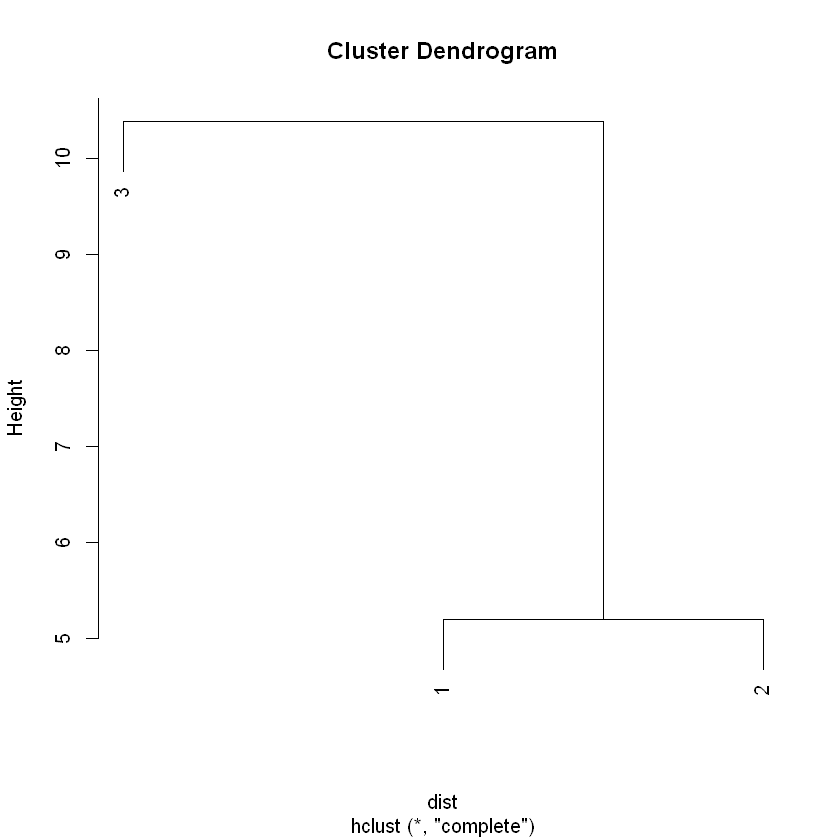

In [124]:
# 유클리디안 거리를 이용한 군집화
install.packages('cluster')
library(cluster)

x = matrix(1:9, nrow = 3, by = T)

dist = dist(x, method = 'euclidian')

# 유클리디안 거리 matrix를 이용한 군집화
hc = hclust(dist)

plot(hc)

- 유사도가 가까운 1과 2가 하나의 군집으로 형성되고, 3은 1과 2의 군집과 거리가 동떨어져 있다. 
- Height는 해당 군집에 대한 유클리디안 거리를 의미.